Importing necassary libraries and frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer


Getting our cleaned data from the directory that we saved in previously

In [2]:
# diabetes_data = pd.read_csv("cleaned_diabetes_data.csv")
diabetes_data = pd.read_pickle("cleaned_diabetes_data.pkl")


Verifying catergories and int64(numerical) classes for our features that we previously changed to

In [3]:
diabetes_data.dtypes

race                            category
gender                          category
admission_type_id                  int64
discharge_disposition_id           int64
admission_source_id                int64
time_in_hospital                   int64
num_lab_procedures                 int64
num_procedures                     int64
num_medications                    int64
number_outpatient                  int64
number_emergency                   int64
number_inpatient                   int64
diag_1                          category
diag_2                          category
diag_3                          category
number_diagnoses                   int64
max_glu_serum                   category
A1Cresult                       category
metformin                       category
repaglinide                     category
nateglinide                     category
chlorpropamide                  category
glimepiride                     category
acetohexamide                   category
glipizide       

This part of the code was to optimize the results of the best model. Through various tries, I discovered that dropping the diag_1, diag2, and diag3 column will produce our best model.

In [4]:
diabetes_data.head()
# diabetes_data = diabetes_data.drop(columns=["A1Cresult","max_glu_serum",'metformin',
#  'repaglinide',
#  'nateglinide',
#  'chlorpropamide',
#  'glimepiride',
#  'acetohexamide',
#  'glipizide',
#  'glyburide',
#  'tolbutamide',
#  'pioglitazone',
#  'rosiglitazone',
#  'acarbose',
#  'miglitol',
#  'troglitazone',
#  'tolazamide',
#  'examide',
#  'citoglipton',
#  'insulin',
#  'glyburide-metformin',
#  'glipizide-metformin',
#  'glimepiride-pioglitazone',
#  'metformin-rosiglitazone',
#  'metformin-pioglitazone', ])


# diabetes_data["emergency_inpatient_outpatient"] = (diabetes_data['number_emergency'] +
#                                         diabetes_data['number_inpatient'] +
#                                         diabetes_data['number_outpatient'])
# diabetes_data = diabetes_data.drop(columns=['number_emergency', 'number_inpatient', 'number_outpatient'])
diabetes_data.drop(columns=["diag_1", "diag_2", "diag_3"], inplace=True)

Seperating our target from the cleaned dataset

In [5]:
target_data = diabetes_data["readmitted"]
# label_encoder = LabelEncoder()
# target_data = label_encoder.fit_transform(target_data)

Readmittance within 30 days (<30) is replaced with 1 and the values "No" and ">30" is replaced with 0

# We are creating a Binary classification of readmittance value. 


In [6]:
# > 30 and NO is repaced by 0 and <30  is replaced by 1
target_data = target_data.replace({'<30': 1, '>30':0, "NO":0})


Verifying our target data only contains 0 and 1

In [7]:
target_data.unique()

[0, 1]
Categories (2, int64): [1, 0]

Now, dropping the target from the cleaned dataset and prepare for datasplit

In [8]:
features_diabetes_data = diabetes_data.drop(columns="readmitted")
#verify all features names are intact
features_diabetes_data.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diabetic_specific_diagnosis,time_spent_hospital_with_med,age_group
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,No,No,No,No,No,Ch,Yes,0,54,young
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,Yes,1,26,young
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,No,No,No,No,No,Ch,Yes,0,32,middle_age
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,No,No,No,No,No,Ch,Yes,1,8,middle_age
5,Caucasian,Male,1,1,2,3,31,6,16,0,...,No,No,No,No,No,No,Yes,1,48,middle_age


# Train Test Split

Using the train test split from Sklearn. note that I am using startify because I want the proportions
of the target to be balanced

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features_diabetes_data,target_data , train_size=.8,random_state=42, stratify=target_data)

In [10]:
x_train.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'diabetic_specific_diagnosis', 'time_spent_hospital_with_med',
       'age_group'],
      dtype='object')

In [11]:
# insanity test for confirming the split
print(f"x_train length  is {len(x_train)} which  should be equal to x_train of length {len(y_train)}")

x_train length  is 78500 which  should be equal to x_train of length 78500


In [12]:
x_train.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diabetic_specific_diagnosis,time_spent_hospital_with_med,age_group
21855,Caucasian,Female,3,2,1,10,39,1,14,0,...,No,No,No,No,No,No,Yes,0,140,Seniors
44806,Caucasian,Female,1,1,7,12,41,2,23,0,...,No,No,No,No,No,Ch,Yes,0,276,Seniors
77799,Caucasian,Female,3,1,1,9,52,2,21,0,...,No,No,No,No,No,Ch,Yes,0,189,Seniors
65752,Caucasian,Male,1,1,7,7,40,3,9,0,...,No,No,No,No,No,No,No,0,63,Seniors
26763,Caucasian,Female,1,1,6,4,40,0,12,0,...,No,No,No,No,No,No,No,0,48,Seniors


In [13]:
y_train.head()

21855    0
44806    0
77799    0
65752    0
26763    0
Name: readmitted, dtype: category
Categories (2, int64): [1, 0]

Seperate categorical feature from numerical features

In [14]:
categorical_features = [feature for feature in x_train.columns[x_train.dtypes=="category"]]
numerical_features = [feature for feature in diabetes_data.columns[diabetes_data.dtypes=="int64"]]

In [15]:
categorical_features

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'age_group']

In [16]:
numerical_features

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'diabetic_specific_diagnosis',
 'time_spent_hospital_with_med']

Insanity check

In [17]:
#Verfying all all columns are present before establishing pipeline
print(f"Length of {len(categorical_features)} + {len(numerical_features)} = {len(features_diabetes_data.columns)}")

Length of 30 + 13 = 43


# Numerical and categorical pipeline


In [18]:
log_transformer = FunctionTransformer(np.log1p)
num_pipeline = Pipeline(steps= [
                                ("imputer", SimpleImputer(strategy="mean")),
                                ("log_transform", log_transformer),
                                ("scaler", StandardScaler())
                        
])
cat_pipeline = Pipeline(steps=[
                                ("imputer",SimpleImputer(strategy="most_frequent")),
                                ("one_hot_encode", OneHotEncoder(drop="first", sparse_output=False,handle_unknown='ignore'))
])


# Column transfer to combine pipeline

In [19]:
preprocessor = ColumnTransformer(
                transformers = [ ("number", num_pipeline, numerical_features),
                                ("category", cat_pipeline, categorical_features)
                               ]
                    
)

# Logistic regression Model

In [20]:
# I first tried max iter = 1000 but it was erroring out because the iteration was too small to reach a solution so
# I doubled to iteration to 2000
log_reg_pipeline = Pipeline(steps=[("preprocessor", preprocessor),("classifier", LogisticRegression(max_iter=2000))
                                  ])


Now let us fit the pipeline on the data

In [21]:
log_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications...
                                                   'glyburide', 'tolbutamide',
                                                   'pioglitazone',
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone',
                                                   'metformin-pioglitazone',
                                                   'change', 'diabetesMed',
                                                   'age_group'])])),
                ('classifier', LogisticRegression(max_iter=2000))])

In [22]:
readmitanc_predict = log_reg_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [23]:
print(f"Report {classification_report(y_test, readmitanc_predict)}")

Report               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17410
           1       0.33      0.00      0.00      2215

    accuracy                           0.89     19625
   macro avg       0.61      0.50      0.47     19625
weighted avg       0.82      0.89      0.83     19625



In [24]:
print(f"Accuracy is {accuracy_score(y_test, readmitanc_predict)}")

Accuracy is 0.8870318471337579


There is a massive imbalance between the two classes. As you can see, the model is good at predicting No readmissions, but it does a terrible job predicting readmittance within 30 days. It only correctly predicts 50 percent of readmissions. The recall is worst with predicting 1 percent of the actual readmission.
Therefore, we need to balance the classes with the SMOT technique properly.


In [25]:
from imblearn.over_sampling import SMOTE
# sckitlearn pipeline wont work with smot so I am importing Imbpipeline from imbLearn
from imblearn.pipeline import Pipeline as ImbPipeline

In [26]:
y_test[45:55]

92765    0
14837    0
76552    0
76591    0
6077     0
56295    0
43       0
57021    0
67320    0
612      0
Name: readmitted, dtype: category
Categories (2, int64): [1, 0]

#  Random Forest Model

In [27]:

random_forest_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),
                                         ("smote", SMOTE(random_state=42, k_neighbors=3)),
                                         ("classifier", RandomForestClassifier(random_state=42))
                                  ])
random_forest_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications...
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone',
                                                   'metformin-pioglitazone',
                                                   'change', 'diabetesMed',
                                                   'age_group'])])),
                ('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
# Now predicting
readmitanc_predict_rf = random_forest_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [29]:
print(f"Accuracy is {accuracy_score(y_test, readmitanc_predict_rf)}")

Accuracy is 0.8827006369426752


In [30]:
print(f"Report {classification_report(y_test, readmitanc_predict_rf)}")

Report               precision    recall  f1-score   support

           0       0.89      0.99      0.94     17410
           1       0.28      0.02      0.04      2215

    accuracy                           0.88     19625
   macro avg       0.58      0.51      0.49     19625
weighted avg       0.82      0.88      0.84     19625



#using class_weight parameter to give more wieght to the minority class and see the difference

In [31]:
rand_forest_cw_included = RandomForestClassifier(class_weight="balanced",random_state=42)
random_forest_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),
                                         ("smote", SMOTE(random_state=42)),
                                         ("classifier", rand_forest_cw_included)])


In [32]:
random_forest_pipeline.fit(x_train,y_train)
predict_random_forest = random_forest_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
print(f"Accuracy is {accuracy_score(y_test, predict_random_forest)}")

Accuracy is 0.8825987261146497


In [34]:
print(f"Report {classification_report(y_test, predict_random_forest)}")

Report               precision    recall  f1-score   support

           0       0.89      0.99      0.94     17410
           1       0.29      0.03      0.05      2215

    accuracy                           0.88     19625
   macro avg       0.59      0.51      0.49     19625
weighted avg       0.82      0.88      0.84     19625



# XGB Classifier Model with Smote for class imbalance

In [35]:
# XGBClassifier boost Pipeline
xgb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    #to address the class imbalance, I am using smote
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])



In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__max_depth": [3, 4, 5, 6],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__n_estimators": [300, 400, 500, 600]
}


grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    # my model is trained on 4 fold. 1 fold is used for validating
    cv=5, 
    #again using scoring based on f1 for imbalanced data
    scoring="f1",
    #using max cpu power 
    n_jobs=-1,             
    verbose=1
)


In [37]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not u

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all z

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not us

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:43:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not u

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Use

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:45:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Use

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:46:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:46:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:46:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categor

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:46:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:46:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Use

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('number',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['admission_type_id',
                                                                          'discharge_disposition_id',
                                                                          'admission_source_id',
                                                                          'time_in_hospital',
                                                                          'num_lab_procedures',
                                                                          'num_...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [300, 400, 500, 600]},
             scoring='f1', verbose=1)

In [38]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation F1-score:", grid_search.best_score_)

Best parameters found: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Best cross-validation F1-score: 0.21714267408119553


In [39]:
#applies the best estimator. in my case learning rate of 0.01, max depth of 3 and n_estimator of 300
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [40]:
print(f"The accuracy score is  {accuracy_score(y_test, y_pred)}")
print(f" {classification_report(y_test, y_pred)}")


The accuracy score is  0.833171974522293
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     17410
           1       0.23      0.21      0.22      2215

    accuracy                           0.83     19625
   macro avg       0.57      0.56      0.56     19625
weighted avg       0.83      0.83      0.83     19625



This model is still not performing for the minority class. It has excellent precison, recall and f1-score on predicting no-readmission.
However, the precision and recall as well as f1 score improved compared to the Random Forest Classifer model.
of all predicted readmission, only 23% were readmitted. This means it has lots of False positives.
And it has also has lots of False Negatives. The model predicted only 21% of true Readmissions. 
F1 score of .22 is very low.

In [41]:
y_probability = best_model.predict_proba(x_test)[:,1]

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [42]:
roc_auc_val = roc_auc_score(y_test, y_probability)

In [43]:
print(roc_auc_val)

0.6259240492542752


Plotting the ROC-AUC Curve for this model

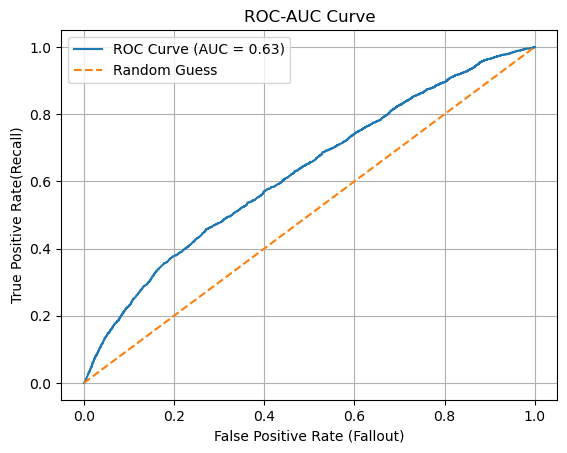

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability)

plt.figure()
plt.title('ROC-AUC Curve')
plt.plot(false_positive_rate, true_positive_rate, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlabel('False Positive Rate (Fallout)')
plt.ylabel('True Positive Rate(Recall)')

plt.legend(loc='upper left')
plt.grid()
plt.show()


For the Numerical Pipeline, I am going to replace logit transformer with FunctionTransformer
and standard Scaler with Robust scaler because the score of 0.24 precision and 0.21 recall for the minority 
class is not effective.

# XGBoost Classifier Model with Class weighting for imbalanced Readmission

Creating pipeline with robust scaler and Function Transformer

In [45]:
from sklearn.preprocessing import FunctionTransformer, RobustScaler
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
#     ("log_transform", FunctionTransformer(np.log1p, validate=False)),
    #This time, I used Robust Scaler instead of relying on log_transofrm. As I had outliers in my features, which i
    # kept because of its importance of predicting readmittance for high risk diabetic patients.
    #Robust scaler works better with outliers in data.
    ("scaler", RobustScaler())
])

Also creating a new category pipeline to handle uknow with "infrequent_if_exist" due to warning messages
while running grid search

In [46]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    #changing handle_unknown to "ignore"
    ("one_hot_encode", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'))
])


In [47]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

In [48]:
# Here we trying to balance the class by introducing the imbalance ration in the XGB classifier.
# This imbalance is the ration of Number of negative cases( in our data is No readmisson) and Number of positive
#cases which is (readmission)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [49]:

xgb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
#     ("smot", SMOTE(sampling_strategy=0.3 , random_state=42)),
    ("classifier", XGBClassifier( 
        #specifying this is a binary class problem and the model will treat it as binary. The training will be done
        #with Logistic losses.
        objective="binary:logistic",
        #using scale_pos_weight derived from above
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False, 
        # mlogloss is for more than 2 classes for the target prediction. We had three classes before. I 
        # categorized it to onle 2 classes
#         eval_metric="mlogloss",
        # since we have only two classes we use logloss
        eval_metric="logloss",
        random_state=42,
        # trying few options
        reg_lambda=1.0, 
        reg_alpha=0.1
    ))
])

In [50]:
#Tried diffrent settings
# param_grid = {
#     "classifier__max_depth": [3, 5],
#     "classifier__learning_rate": [0.01, 0.1],
#     "classifier__n_estimators": [200, 300],
#     "classifier__subsample": [0.8, 1.0],
#     "classifier__colsample_bytree": [0.8, 1.0]
# }

In [51]:
param_dist = {
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.05],
    "classifier__n_estimators": [100, 200],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

In [52]:
# from sklearn.model_selection import StratifiedKFold
# grid_search = GridSearchCV(
#     estimator=xgb_pipeline,
#     param_grid=param_grid,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     scoring="recall",  
#     n_jobs=-1,
#     verbose=1
# )

In [53]:
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Only try 10 random combinations
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # Reduced to 3 folds
    scoring="recall", #  Recall is more important here in my case
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [54]:
#tried Grid search 
# grid_search.fit(x_train, y_train)

In [55]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [9, 16, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 17, 22, 24] during transform. These unknown categories will

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['admission_type_id',
                                                                                'discharge_disposition_id',
                                                                                'admission_source_id',
                                                                                'time_in_hospital',
                                                                                'num_lab_procedures',
                                                                                'num_pro...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [100, 200],
                                        'classifier__subsample': [0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=1)

In [56]:
# best_model = grid_search.best_estimator_

In [57]:
best_model = random_search.best_estimator_

In [58]:
y_pred = best_model.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72     17410
           1       0.17      0.65      0.26      2215

    accuracy                           0.59     19625
   macro avg       0.55      0.62      0.49     19625
weighted avg       0.84      0.59      0.67     19625



Precision: For those who were actually "not readmitted", 93 percent of the prediction was correct. However, 17% of "readmission" prediction were correct.
Recall: The actual "not admitted", 58% of them were caught by the model, For those who were actually "readmitted",65% were caught. This is a huge boost from 21% only caught from the Previous XGB Classifier with SMOTE.
The accuracy of the model is 59%. That makes sense because we focused on the recall of the minority class(readmittance).
In healthcare settings, catching a readmission is more important than missing the readmission. We are flagging more patients who are at risk!

In [60]:
print(f"The accuracy score is  {round(accuracy_score(y_test, y_pred),2)}")

The accuracy score is  0.59


In [61]:
y_probability = best_model.predict_proba(x_test)[:,1]

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [62]:
roc_auc_val = roc_auc_score(y_test, y_probability)

In [63]:
print(roc_auc_val)

0.6515019779245212


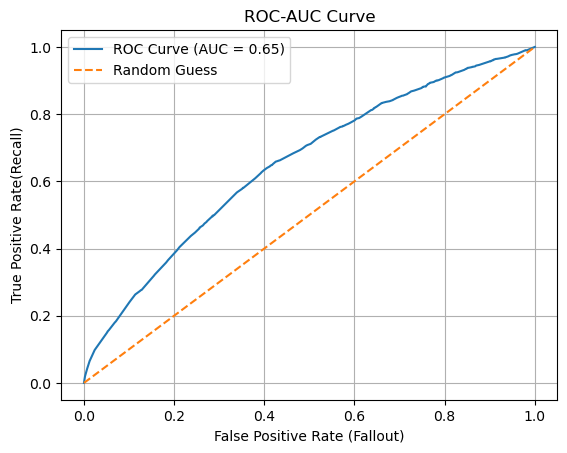

In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability)

plt.figure()
plt.title('ROC-AUC Curve')
plt.plot(false_positive_rate, true_positive_rate, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlabel('False Positive Rate (Fallout)')
plt.ylabel('True Positive Rate(Recall)')

plt.legend(loc='upper left')
plt.grid()
plt.show()


# XGBoost with Log-transform, SMOTE and AUC weighted Model

In [65]:
num_pipeline = Pipeline([
    ("imputer",     SimpleImputer(strategy="mean")),
    #Introduce log transformer 
    ("log_transform", FunctionTransformer(np.log1p, validate=False)),
    ("scaler",      RobustScaler()),
])
# Same settings as the previous model
cat_pipeline = Pipeline([
    ("imputer",       SimpleImputer(strategy="most_frequent")),
    ("one_hot_encode", OneHotEncoder(
        drop="first",
        sparse_output=False,
        handle_unknown="ignore"
    )),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features),
])

#Try SMOTE again 
imb_pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote",        SMOTE(sampling_strategy=0.3, random_state=42)),
    ("classifier",   XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="auc",           
        scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
        random_state=42
    ))
])

param_dist = {
    "classifier__max_depth":       [3,5,7,9],
    "classifier__learning_rate":   [0.005,0.01,0.05,0.1],
    "classifier__n_estimators":    [100,200,400,800],
    "classifier__subsample":       [0.6,0.8,1.0],
    "classifier__colsample_bytree":[0.6,0.8,1.0],
    "classifier__reg_alpha":       [0,0.1,1,5],
    "classifier__reg_lambda":      [0.1,1,5,10],
}

search = RandomizedSearchCV(
    estimator=imb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="f1",     
    n_jobs=-1,
    verbose=2,
    random_state=42,
)






In [66]:
search.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are no

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:49:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:50:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [9, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:50:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(d

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are no

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('log_transform',
                                                                                                FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['admission_type_id',
                                                                                'discharge_disposition_id',
                                                                                'admission_...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.005,
                                                                      0.01,
                                                                      0.05,
                                                                      0.1],
                                        'classifier__max_depth': [3, 5, 7, 9],
                                        'classifier__n_estimators': [100, 200,
                                                                     400, 800],
                                        'classifier__reg_alpha': [0, 0.1, 1, 5],
                                        'classifier__reg_lambda': [0.1, 1, 5,
                                                                   10],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [78]:
best_model = search.best_estimator_

y_pred = best_model.predict(x_test)




/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [80]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70     17410
           1       0.16      0.67      0.26      2215

    accuracy                           0.58     19625
   macro avg       0.55      0.62      0.48     19625
weighted avg       0.84      0.58      0.65     19625



In [81]:
print(f"The accuracy score is  {round(accuracy_score(y_test, y_pred),2)}")

The accuracy score is  0.58


By Adding a log Transform and SMOTE and optimizing for F1, we bumped our recall for the minority class from 0.65 to 0.67. A small drop in accuracy from 0.59 to 0.58 occured. 
Since catching readmission is the top Goal in Healthcare, The improved recall score is better in this classification task.

In [82]:
y_probability = best_model.predict_proba(x_test)[:,1]

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


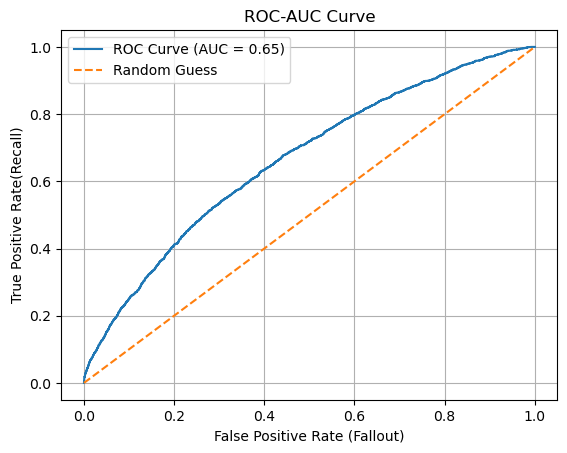

In [83]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability)

plt.figure()
plt.title('ROC-AUC Curve')
plt.plot(false_positive_rate, true_positive_rate, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlabel('False Positive Rate (Fallout)')
plt.ylabel('True Positive Rate(Recall)')

plt.legend(loc='upper left')
plt.grid()
plt.show()

The Area under the curve chart is exactly the same for this model compared to the previous best model(XGBoost Classifier Model with Class weighting for imbalanced Readmission)

Therefore we are choosing this Model(XGBoost with Log-transform, SMOTE and AUC weighted Model)

Next, we’ll extract all the feature names from our preprocessing pipeline, feed our test set through it, and then use SHAP to identify and visualize the features that most influence our model’s predictions.

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
100%|===================| 19536/19625 [01:41<00:00]        

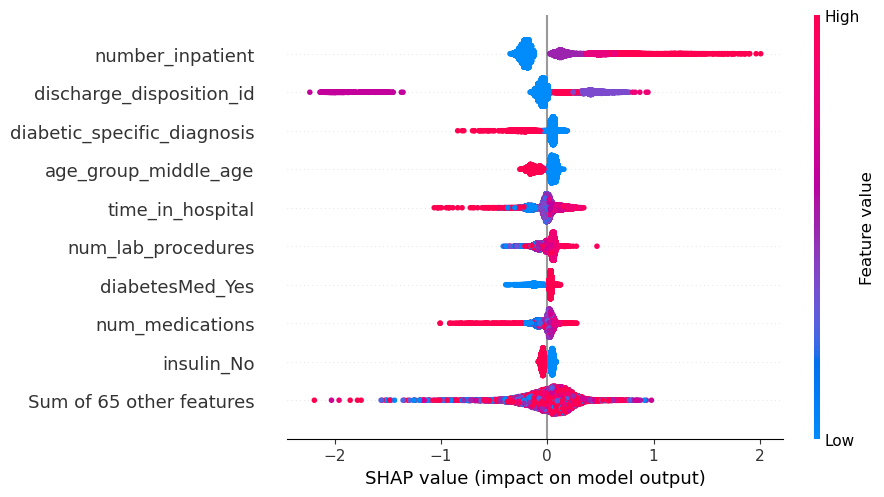

In [71]:
import shap
import pandas as pd

# Here  I am grabbing the preprocessor and classifier from the pipeline
preprocessor = best_model.named_steps["preprocessor"]
classifier = best_model.named_steps["classifier"]

def retrieve_features_pipeline(preprocessor):
    feature_names = []

    # Numerical features extraction
    # at position 0 is our numberical pipeline which is a tuple, and position 2 is our names of numerical features
    numerical_features = preprocessor.transformers_[0][2]
    # adding our numerical features names in the feature list above
    feature_names += numerical_features

    # Categorical features
    # position 1 is our categorical pipeline 
    categorical_pipeline = preprocessor.transformers_[1][1]
    # this gives our categorical feature names from the pipeline
    categorical_features = preprocessor.transformers_[1][2]
    
    # need the cat_pipeline because one hot encoder we used previously, creates new columns with new names
    one_hot_pipeline = categorical_pipeline.named_steps["one_hot_encode"]
    # now we are extracing the new names 
    one_hot_extracted_features = one_hot_pipeline.get_feature_names_out(categorical_features)
    # passing the new names to the feature_name list
    feature_names += list(one_hot_extracted_features)
    return feature_names

#Now that we have a function above that goes through the pipeline,we can now extract the feature names
# this gives a numpy array
x_transformed_test = preprocessor.transform(x_test)
# now using the above function to retrieve all the names of the comlumns from the pipeline
feature_names_all = retrieve_features_pipeline(preprocessor)
# turning the column names into a dataframe.
x_dataframe = pd.DataFrame(x_transformed_test, columns=feature_names_all)


explainer_ready = shap.Explainer(classifier, x_dataframe)
final_visualization = explainer_ready(x_dataframe)

# Finally, we are able to visualize with shap plots
shap.plots.beeswarm(final_visualization)




The SHAP Chart Tells a story about the top features in our models prediction for readmission The list below is from most import to least important
1) number_inpatient ( The higher the number of impatient visit, the higher the readmittance rate.
2) discharge_dispostion_id ( The previous discharge is a strong indicator)
3) diabetic_specific_diagnosis ( having a diabetic diagnosis increases readmission)
4) age_group ( Middle age patient have higher risk)
5) time in hospital ( Longer stays indicates less likely to be readmitted)
6) num_lab_procedure( Indicates more labs increases readmission slighly)
7) diabetes med (Being in diabetes med also increases readmission slighly)
8) num_med - Having more medication slightly increases readmission
Other 65 features hav very little predictive power for readmission

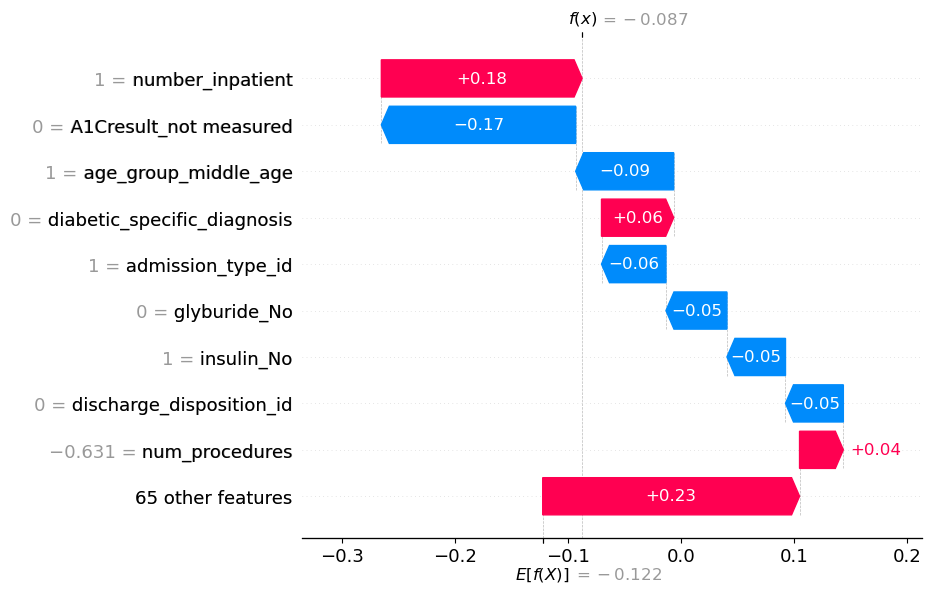

In [72]:
# Waterfall Plot
shap.plots.waterfall(final_visualization[66])

In [84]:
import joblib

In [85]:
joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']